In [1]:
# packages
import os
import time
import math
import torch
import random
import pickle
import pandas
import calendar
import training
import config
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
os.environ['KMP_DUPLICATE_LIB_OK']='True'
torch.set_default_tensor_type(torch.FloatTensor)

In [ ]:
seed = int(sys.argv[1])

for lr in range(0,-7,-1):
    for num_layer in range(2,16):
        
        exp_setup = f'{num_layer}_{lr}_{seed}'
        print(f'The experiment setup is {exp_setup}.')
        
        if os.path.exists(f'./NNs/INV_{exp_setup}'):
            pass
        else:
            
            with open('./data/inv_dataset.p', 'rb') as file:
                a = pickle.load(file)

            X, Y = a['X'], a['Y']
            Xn, Yn = a['Xn'], a['Yn']
            X_min, X_max = a['X_min'], a['X_max']
            Y_min, Y_max = a['Y_min'], a['Y_max']

            X_learn, Y_learn = a['X_learn'], a['Y_learn']
            X_train, Y_train = a['X_train'], a['Y_train']
            X_valid, Y_valid = a['X_valid'], a['Y_valid']
            X_test , Y_test  = a['X_test'] , a['Y_test']

            Xn_learn, Yn_learn = a['Xn_learn'], a['Yn_learn']
            Xn_train, Yn_train = a['Xn_train'], a['Yn_train']
            Xn_valid, Yn_valid = a['Xn_valid'], a['Yn_valid']
            Xn_test , Yn_test  = a['Xn_test'] , a['Yn_test']


            train_data = TensorDataset(Xn_train, Yn_train)
            valid_data = TensorDataset(Xn_valid, Yn_valid)
            test_data  = TensorDataset(Xn_test, Yn_test)

            train_loader = DataLoader(train_data, batch_size=len(train_data))
            valid_loader = DataLoader(valid_data, batch_size=len(valid_data))
            test_loader  = DataLoader(test_data, batch_size=len(test_data))

            topology = (np.round(np.logspace(np.log(X.shape[1]),
                                             np.log(Y.shape[1]),
                                             num=num_layer, base=np.e))).astype(int)

            config.SetSeed(seed)
            model = torch.nn.Sequential()
            for t in range(len(topology)-1):
                model.add_module(f'{t}-MAC', torch.nn.Linear(topology[t], topology[t+1]))
                model.add_module(f'{t}-ACT', torch.nn.PReLU())

            lossfunction = torch.nn.MSELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=10**lr)

            model, train_loss, valid_loss = training.train_nn(model, train_loader, valid_loader, lossfunction, optimizer, UUID=exp_setup)
            torch.save(model, f'./NNs/INV_{exp_setup}')
            
            plt.figure()
            plt.plot(train_loss, label='train')
            plt.plot(valid_loss, label='valid')
            plt.savefig(f'./NNs/train_curve_{exp_setup}.pdf', format='pdf', bbox_inches='tight')


# True result and prediction value

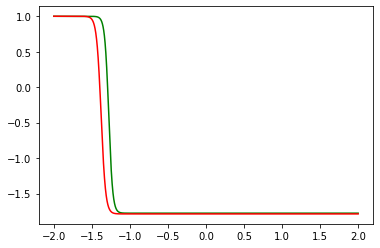

In [9]:
x1=np.linspace(-2,2,4001)
a = prediction_test[0].numpy()
b = y_test[0].numpy()
y1 =  -(a[0] +a[1] * np.tanh((x1- a[2])* a[3]))
y2 =  -(b[0] + b[1]*np.tanh((x1 - b[2])* b[3]))
plt.plot(x1, y1,color='green')
plt.plot(x1, y2,color='red')
plt.show()